In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
station = pd.read_csv('./data/station.csv')
station.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [3]:
stationCorrd = station[['번호','좌표']]

In [4]:
Tashu2013_00 = pd.read_csv('./data/TashuRent2013_00.csv')
Tashu2013_01 = pd.read_csv('./data/TashuRent2013_01.csv')

TashuRental2013 = pd.concat([Tashu2013_00,Tashu2013_01])

TashuRental2013.rename(columns= {'IS_MEMBER' :'회원구분',
                              'RENT_STATION' : '대여 스테이션 정보',
                              'RENT_DATE' : '대여일시',
                              'RETURN_STATION' : '반납 스테이션 정보',
                              'RETURN_DATE' : '반납일시',
                             }, inplace=True)

TashuRental2013.to_csv('./data/TashuRental2013.csv', index=False)

In [5]:
Tashu2014_00 = pd.read_csv('./data/TashuRent2014_00.csv')
Tashu2014_01 = pd.read_csv('./data/TashuRent2014_01.csv')


def get_new_date(date):
    prpr = {
        '-' : '',
        ':' : '',
        ' ' : '',
    }
    
    for key, value in prpr.items():
        date = date.replace(key, value)
    return date

Tashu2014_01.대여일시 = Tashu2014_01.대여일시.apply(get_new_date)
Tashu2014_01.반납일시 = Tashu2014_01.반납일시.apply(get_new_date)
Tashu2014_01.to_csv('./data/TashuRent2014_01.csv', index=False)

In [6]:
TashuRental2014 = pd.concat([Tashu2014_00,Tashu2014_01])
TashuRental2014.to_csv('./data/TashuRental2014.csv', index=False)

/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
Tashu2015_00 = pd.read_csv('./data/TashuRent2015_00.csv')
Tashu2015_01 = pd.read_csv('./data/TashuRent2015_01.csv')

Tashu2015_00.대여일시 = Tashu2015_00.대여일시.apply(get_new_date)
Tashu2015_00.반납일시 = Tashu2015_00.반납일시.apply(get_new_date)
Tashu2015_00.to_csv('./data/TashuRent2015_00.csv', index=False)

In [8]:
def rm(date):
    prpr = {
        "'" : '',
    }
    
    for key, value in prpr.items():
        date = date.replace(key, value)
    return date

Tashu2015_01.대여일시 = Tashu2015_01.대여일시.apply(rm)
Tashu2015_01.반납일시 = Tashu2015_01.반납일시.apply(rm)
Tashu2015_01.to_csv('./data/TashuRent2015_01.csv', index=False)

In [9]:
TashuRental2015 = pd.concat([Tashu2015_00,Tashu2015_01])
TashuRental2015.to_csv('./data/TashuRental2015.csv', index=False)

In [10]:
Tashu2013 = pd.read_csv('./data/TashuRental2013.csv')
Tashu2014 = pd.read_csv('./data/TashuRental2014.csv')
Tashu2015 = pd.read_csv('./data/TashuRental2015.csv')

TashuRental1314 = pd.concat([Tashu2013, Tashu2014])
TashuRental = pd.concat([TashuRental1314, Tashu2015])
TashuRental = TashuRental.fillna(000000000000)

del TashuRental['회원구분']
del TashuRental['총대여시간']
TashuRental.to_csv('./data/tashu.csv', index=False)

/home/kyle/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [11]:
import datetime

data2013 = pd.read_csv('./data/weather_13.csv')
data2014 = pd.read_csv('./data/weather_14.csv')
data2015 = pd.read_csv('./data/weather_15.csv')

data1314 = pd.concat([data2013, data2014])
dataAll = pd.concat([data1314, data2015])

del dataAll['지점']
dataAll.rename(columns= {'일시':'TIME',
                          '기온(°C)': 'TEMPERATURE',
                          '강수량(mm)' :'RAINFALL',
                          '풍속(m/s)' : 'WINDSPEED',
                          '습도(%)' :'HUMLDITY',
                          '적설(cm)' : 'SNOWFALL',
                             }, inplace=True)

dataAll.to_csv('./data/weather.csv', index=False)

In [12]:
tashu = pd.read_csv('./data/tashu.csv')
rentTashu = tashu[['대여 스테이션 정보','대여일시']]

station['temp']=1
station00 = station[['번호', 'temp']]

weather = pd.read_csv('./data/weather.csv')
weather.rename(columns= {'TIME':'대여일시',
                             }, inplace=True)
weather['temp'] =1
temp00 = pd.merge(station00, weather)
del temp00['temp']

temp00.rename(columns= {'번호':'STATION',
                             }, inplace=True)
temp00=temp00.fillna(0)

temp00['TimeDate'] = temp00['대여일시'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
temp00['YEAR'] = temp00['TimeDate'].dt.strftime('%Y').astype('object')
temp00['MONTH'] = temp00['TimeDate'].dt.strftime('%m').astype('object')
temp00['DAY'] = temp00['TimeDate'].dt.strftime('%d').astype('object')
temp00['HOUR'] = temp00['TimeDate'].dt.strftime('%H').astype('object')
temp00['WEEKDAY'] = temp00['TimeDate'].dt.weekday.astype('object')

In [13]:
rentTashu = tashu[['대여 스테이션 정보', '대여일시']]
rentTashu.rename(columns= {'대여 스테이션 정보': 'STATION',
                             }, inplace=True)

rentTashu['TimeDate'] = rentTashu['대여일시'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
rentTashu['YEAR'] = rentTashu['TimeDate'].dt.strftime('%Y').astype('object')
rentTashu['MONTH'] = rentTashu['TimeDate'].dt.strftime('%m').astype('object')
rentTashu['DAY'] = rentTashu['TimeDate'].dt.strftime('%d').astype('object')
rentTashu['HOUR'] = rentTashu['TimeDate'].dt.strftime('%H').astype('object')
rentTashu['WEEKDAY'] = rentTashu['TimeDate'].dt.weekday.astype('object')
rentTashu['대여일시'] = rentTashu['YEAR'] + rentTashu['MONTH'] + rentTashu['DAY'] + rentTashu['HOUR'] + '00'


/home/kyle/anaconda3/envs/LJH/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
def season(month):
    prpr = {
        '01': '3',
        '02': '3',
        '03': '0',
        '04': '0',
        '05': '0',
        '06': '1',
        '07': '1',
        '08': '1',
        '09': '2',
        '10': '2',
        '11': '2',
        '12': '3',
    }
    for key, value in prpr.items():
        month = month.replace(key, value)
    return month

temp00['SEASON'] = temp00['MONTH'].apply(season)

In [15]:
def season(month):
    prpr = {
        '01': '3',
        '02': '3',
        '03': '0',
        '04': '0',
        '05': '0',
        '06': '1',
        '07': '1',
        '08': '1',
        '09': '2',
        '10': '2',
        '11': '2',
        '12': '3',
    }
    for key, value in prpr.items():
        month = month.replace(key, value)
    return month

rentTashu['SEASON'] = rentTashu['MONTH'].apply(season)

In [16]:
rentTashu['RENTCOUNT'] = 1
del rentTashu['TimeDate']
rentTashu

,STATION,대여일시,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
0,43.0,201301010500,2013,01,01,05,1,3,1
1,97.0,201301010600,2013,01,01,06,1,3,1
2,2.0,201301010600,2013,01,01,06,1,3,1
3,106.0,201301011000,2013,01,01,10,1,3,1
4,4.0,201301011100,2013,01,01,11,1,3,1
5,21.0,201301011100,2013,01,01,11,1,3,1
6,90.0,201301011200,2013,01,01,12,1,3,1
7,13.0,201301011300,2013,01,01,13,1,3,1
8,1.0,201301011300,2013,01,01,13,1,3,1
9,1.0,201301011300,2013,01,01,13,1,3,1


In [22]:

temp11 = rentTashu.groupby([rentTashu['대여일시'],rentTashu['YEAR'],rentTashu['MONTH'],rentTashu['DAY'],rentTashu['HOUR']], as_index=False).count()
del temp11['STATION']
del temp11['대여일시']
del temp11['WEEKDAY']
del temp11['SEASON']
temp11.astype('object')

,YEAR,MONTH,DAY,HOUR,RENTCOUNT
0,2013,01,01,05,1
1,2013,01,01,06,2
2,2013,01,01,10,1
3,2013,01,01,11,2
4,2013,01,01,12,1
5,2013,01,01,13,15
6,2013,01,01,14,6
7,2013,01,01,15,6
8,2013,01,01,16,9
9,2013,01,01,17,7


In [23]:
type(temp11)

pandas.core.frame.DataFrame

In [24]:

total_rent=pd.merge(temp00, temp11, on=["YEAR", "MONTH","DAY","HOUR"], how='left')
del total_rent['TimeDate']
del total_rent['대여일시']
total_rent= total_rent.fillna(0)

In [25]:
total_rent.to_csv('./data/total_rent.csv', index=False)
total_rent

,STATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
0,1,-8.8,0.0,0.1,90.0,8.8,2013,01,01,00,1,3,0.0
1,1,-8.5,0.0,0.9,90.0,8.8,2013,01,01,01,1,3,0.0
2,1,-8.5,0.0,1.0,89.0,8.8,2013,01,01,02,1,3,0.0
3,1,-9.0,0.0,0.7,91.0,8.8,2013,01,01,03,1,3,0.0
4,1,-9.1,0.0,0.6,92.0,8.8,2013,01,01,04,1,3,0.0
5,1,-9.4,0.0,0.5,92.0,8.8,2013,01,01,05,1,3,1.0
6,1,-9.0,0.0,1.4,93.0,8.8,2013,01,01,06,1,3,2.0
7,1,-8.3,0.0,0.2,94.0,9.6,2013,01,01,07,1,3,0.0
8,1,-7.3,0.0,1.7,96.0,10.5,2013,01,01,08,1,3,0.0
9,1,-6.4,2.2,0.9,96.0,12.8,2013,01,01,09,1,3,0.0


In [26]:
test2015 = total_rent[total_rent['YEAR'].isin(['2015'])]
test2015 = test2015[test2015['MONTH'].isin(['01'])]
test2015= test2015[test2015['DAY'].isin(['01'])]
test2015= test2015[test2015['STATION'].isin(['3'])]

test2015.to_csv('./data/test2015.csv', index=False)
test2015

,STATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,RENTCOUNT
70080,3,-4.1,0.3,4.2,82.0,0.5,2015,01,01,00,3,3,3.0
70081,3,-5.7,0.0,2.8,74.0,0.5,2015,01,01,01,3,3,0.0
70082,3,-6.4,0.0,2.6,60.0,0.5,2015,01,01,02,3,3,0.0
70083,3,-6.5,0.0,2.7,53.0,0.5,2015,01,01,03,3,3,0.0
70084,3,-6.6,0.0,2.5,61.0,0.5,2015,01,01,04,3,3,0.0
70085,3,-7.0,0.0,2.4,73.0,0.5,2015,01,01,05,3,3,1.0
70086,3,-7.2,0.0,1.4,79.0,0.5,2015,01,01,06,3,3,3.0
70087,3,-7.6,0.0,1.4,74.0,0.5,2015,01,01,07,3,3,17.0
70088,3,-8.3,0.0,1.1,74.0,0.5,2015,01,01,08,3,3,87.0
70089,3,-7.4,0.0,0.9,61.0,0.5,2015,01,01,09,3,3,73.0


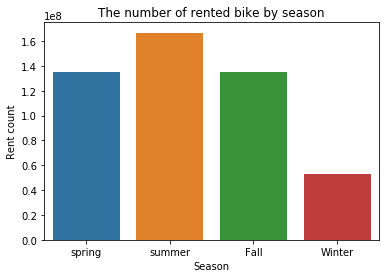

In [27]:
group_season = total_rent.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y =group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['spring', 'summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

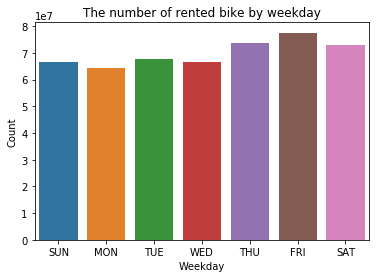

In [28]:
group_weekday = total_rent.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

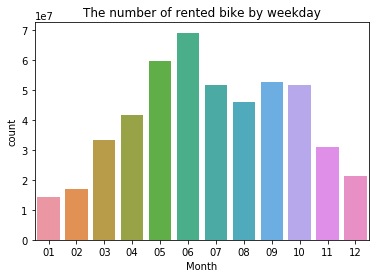

In [29]:
group_mn = total_rent.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'], y = group_mn['RENTCOUNT'])
ax.set(xlabel='Month', ylabel='count')
plt.title('The number of rented bike by weekday')
plt.show()

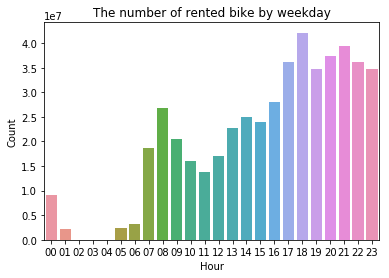

In [30]:
group_hr = total_rent.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by weekday')
plt.show()

In [31]:
countRental =TashuRental.groupby([TashuRental['대여 스테이션 정보'], TashuRental['반납 스테이션 정보']]).count()
Top10Rental = countRental.nlargest(10,'대여일시')

del Top10Rental['반납일시']

Top10Rental.rename(columns= {
                             '대여일시':'Count',
                             }, inplace=True)


Top10Rental.to_csv('./data/Top10Rental_chart.csv')
Top10Rental

,,Count
대여 스테이션 정보,반납 스테이션 정보,
3.0,3.0,84496
31.0,31.0,21749
56.0,56.0,18343
21.0,105.0,17220
1.0,1.0,14489
32.0,32.0,12177
105.0,21.0,12154
33.0,33.0,11973
17.0,17.0,11966


In [95]:
Ex1000 = countRental.nlargest(1000,'대여일시')
Ex1000 = Ex1000.fillna(0)
Ex1000 = Ex1000.reset_index()
Ex1000

,대여 스테이션 정보,반납 스테이션 정보,대여일시,반납일시
0,3.0,3.0,84496,84496
1,31.0,31.0,21749,21749
2,56.0,56.0,18343,18343
3,21.0,105.0,17220,17220
4,1.0,1.0,14489,14489
5,32.0,32.0,12177,12177
6,105.0,21.0,12154,12154
7,33.0,33.0,11973,11973
8,17.0,17.0,11966,11966
9,56.0,32.0,11868,11868


In [32]:
countRental

대여일시  반납일시
대여 스테이션 정보 반납 스테이션 정보            
0.0        0.0          181   181
           1.0            8     8
           2.0            8     8
           3.0           14    14
           4.0            1     1
           5.0            6     6
           6.0            1     1
           7.0           10    10
           8.0           18    18
           9.0            6     6
           10.0           3     3
           11.0           4     4
           12.0           6     6
           13.0          10    10
           14.0           4     4
           15.0           7     7
           16.0           6     6
           17.0          16    16
           18.0          24    24
           19.0          12    12
           20.0           5     5
           21.0          13    13
           22.0           3     3
           23.0           4     4
           25.0           4     4
           26.0           2     2
           27.0           4     4
           28.0           1     1
           29.0           4     4
           30.0           3     3
...                     ...   ...
195.0      198.0          1     1
196.0      10.0           1     1
           45.0           1     1
           196.0          1     1
197.0      197.0         11    11
           199.0          2     2
198.0      198.0         11    11
           201.0          2     2
           202.0          1     1
199.0      25.0           2     2
           31.0           4     4
           60.0           1     1
           182.0          1     1
           191.0          1     1
           199.0         12    12
           200.0          2     2
           202.0          1     1
200.0      31.0           1     1
           54.0           3     3
           130.0          1     1
           179.0          1     1
           191.0          1     1
           200.0         13    13
           201.0          1     1
201.0      196.0          1     1
           197.0          2     2
           201.0        712   712
202.0      194.0          1     1
           199.0          1     1
           202.0          1     1

[24545 rows x 2 columns]

In [33]:
stationCorrd.rename(columns ={'번호': '대여 스테이션 정보',
                             }, inplace=True)

mTop10 = pd.merge(Top10Rental, stationCorrd, on='대여 스테이션 정보')

mTop10.rename(columns ={'좌표': '대여 스테이션 좌표',
                             }, inplace=True)
mTop10 =mTop10.reindex(index =[0,1,2,4,5,6,7,8,9,3])

In [34]:
mTop10

,대여 스테이션 정보,Count,대여 스테이션 좌표
0,3.0,84496,"36.369855,127.388749"
1,31.0,21749,"36.361773, 127.357485"
2,56.0,18343,"36.361736, 127.344994"
4,21.0,17220,"36.373457,127.359293"
5,1.0,14489,"36.374325,127.387462"
6,32.0,12177,"36.359293, 127.354503"
7,105.0,12154,"36.364177,127.358845"
8,33.0,11973,"36.358494, 127.361197"
9,17.0,11966,"36.35219,127.378814"
3,56.0,11868,"36.361736, 127.344994"


In [35]:
Top10Rental

,,Count
대여 스테이션 정보,반납 스테이션 정보,
3.0,3.0,84496
31.0,31.0,21749
56.0,56.0,18343
21.0,105.0,17220
1.0,1.0,14489
32.0,32.0,12177
105.0,21.0,12154
33.0,33.0,11973
17.0,17.0,11966


In [36]:
stationCorrd.rename(columns ={'대여 스테이션 정보': '반납 스테이션 정보',
                             }, inplace=True)
mmTop10 = pd.merge(Top10Rental, stationCorrd, on='반납 스테이션 정보')

mmTop10.rename(columns ={'좌표': '반납 스테이션 좌표',
                             }, inplace=True)
stationCorrd.rename(columns ={'반납 스테이션 정보': '번호',
                             }, inplace=True)

mmTop10 =mmTop10.reindex(index =[0,1,2,3,4,5,7,8,9,6])
mmTop10

,반납 스테이션 정보,Count,반납 스테이션 좌표
0,3.0,84496,"36.369855,127.388749"
1,31.0,21749,"36.361773, 127.357485"
2,56.0,18343,"36.361736, 127.344994"
3,105.0,17220,"36.364177,127.358845"
4,1.0,14489,"36.374325,127.387462"
5,32.0,12177,"36.359293, 127.354503"
7,21.0,12154,"36.373457,127.359293"
8,33.0,11973,"36.358494, 127.361197"
9,17.0,11966,"36.35219,127.378814"
6,32.0,11868,"36.359293, 127.354503"


In [37]:
mTop10 = mTop10.reset_index()

In [38]:
mmTop10 = mmTop10.reset_index()

In [39]:
Top10Rental = pd.concat([mTop10, mmTop10], axis=1)
Top10Rental.to_csv('./data/Top10Rental.csv')
Top10Rental

,index,대여 스테이션 정보,Count,대여 스테이션 좌표,index,반납 스테이션 정보,Count,반납 스테이션 좌표
0,0,3.0,84496,"36.369855,127.388749",0,3.0,84496,"36.369855,127.388749"
1,1,31.0,21749,"36.361773, 127.357485",1,31.0,21749,"36.361773, 127.357485"
2,2,56.0,18343,"36.361736, 127.344994",2,56.0,18343,"36.361736, 127.344994"
3,4,21.0,17220,"36.373457,127.359293",3,105.0,17220,"36.364177,127.358845"
4,5,1.0,14489,"36.374325,127.387462",4,1.0,14489,"36.374325,127.387462"
5,6,32.0,12177,"36.359293, 127.354503",5,32.0,12177,"36.359293, 127.354503"
6,7,105.0,12154,"36.364177,127.358845",7,21.0,12154,"36.373457,127.359293"
7,8,33.0,11973,"36.358494, 127.361197",8,33.0,11973,"36.358494, 127.361197"
8,9,17.0,11966,"36.35219,127.378814",9,17.0,11966,"36.35219,127.378814"
9,3,56.0,11868,"36.361736, 127.344994",6,32.0,11868,"36.359293, 127.354503"


In [40]:
import csv

filename = './data/Top10Rental.csv'

top10_latS, top10_lonS= [],[]

with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        corrdS=row[4].split(',')
        top10_latS.append(float(corrdS[0]))
        top10_lonS.append(float(corrdS[1]))
        
with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:  
        corrdE=row[8].split(',')
        top10_latS.append(float(corrdE[0]))
        top10_lonS.append(float(corrdE[1]))      


In [41]:
import gmplot
import statistics
import webbrowser

Top10Map = gmplot.GoogleMapPlotter(statistics.median(top10_latS), statistics.median(top10_lonS), 14)

for i in range(0, 10):
    rentLat,rentLon = [],[]
    rentLat.append(top10_latS[i])
    rentLat.append(top10_latS[i+10])
    rentLon.append(top10_lonS[i])
    rentLon.append(top10_lonS[i+10])
    
    Top10Map.scatter(rentLat, rentLon,'#FF0000', size=50, marker=False)
    Top10Map.plot(rentLat, rentLon, 'cornflowerblue', edge_width=3.0)
    
Top10Map.draw('Top10Rental.html')

#open map at new window
webbrowser.open_new('Top10Rental.html') 

True

In [42]:
tashu00= pd.read_csv('./data/tashu.csv')
station00= pd.read_csv('./data/station.csv')
del tashu00['대여일시']
del tashu00['반납일시']

station00=pd.DataFrame(station00[['번호', '명칭']])
station00.rename(columns ={'번호': '대여 스테이션 정보',
                             }, inplace=True)

rentStation = pd.merge(tashu00, station00, on='대여 스테이션 정보', how='left')
station00.rename(columns ={'대여 스테이션 정보': '반납 스테이션 정보',
                             }, inplace=True)

rentStation = pd.merge(rentStation, station00, on='반납 스테이션 정보', how='left')


In [43]:

rentStation.rename(columns ={'명칭_x': '대여 스테이션 명칭',
                             '명칭_y': '반납 스테이션 명칭',
                             }, inplace=True)
rentStation = rentStation.fillna(0)
rentStation

,대여 스테이션 정보,반납 스테이션 정보,대여 스테이션 명칭,반납 스테이션 명칭
0,43.0,34.0,둔산여고 앞,진달래아파트앞
1,97.0,0.0,가오고등학교 앞,0
2,2.0,10.0,대전컨벤션 센터 앞,만년동 KBS 부근(기업은행 앞)
3,106.0,105.0,카이스트 다솜관,카이스트 서쪽 쪽문
4,4.0,4.0,초원아파트104동부근(버스정류장),초원아파트104동부근(버스정류장)
5,21.0,105.0,카이스트 학사식당 앞,카이스트 서쪽 쪽문
6,90.0,91.0,유등교,버드내네거리
7,13.0,30.0,삼천중학교 앞,선사유적지주차장 앞
8,1.0,1.0,무역전시관입구(택시승강장 앞),무역전시관입구(택시승강장 앞)
9,1.0,2.0,무역전시관입구(택시승강장 앞),대전컨벤션 센터 앞


In [48]:
tashu = pd.read_csv('./data/tashu.csv')
returnTashu = tashu[['반납 스테이션 정보','반납일시']]


station11 = station[['번호', 'temp']]
station11=station11.fillna(0)

weather = pd.read_csv('./data/weather.csv')
weather.rename(columns= {'TIME':'반납일시',
                             }, inplace=True)
weather['temp'] =1
temp11 = pd.merge(station11, weather)
del temp11['temp']

temp11.rename(columns= {'번호':'STATION',
                             }, inplace=True)
temp11=temp11.fillna(000000000000)

temp11['TimeDate'] = temp11['반납일시'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
temp11['YEAR'] = temp11['TimeDate'].dt.strftime('%Y').astype('object')
temp11['MONTH'] = temp11['TimeDate'].dt.strftime('%m').astype('object')
temp11['DAY'] = temp11['TimeDate'].dt.strftime('%d').astype('object')
temp11['HOUR'] = temp11['TimeDate'].dt.strftime('%H').astype('object')
temp11['WEEKDAY'] = temp11['TimeDate'].dt.weekday.astype('object')

In [45]:
temp11

,STATION,반납일시,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,TimeDate,YEAR,MONTH,DAY,HOUR,WEEKDAY
0,1,201301010000,-8.8,0.0,0.1,90.0,8.8,2013-01-01 00:00:00,2013,01,01,00,1
1,1,201301010100,-8.5,0.0,0.9,90.0,8.8,2013-01-01 01:00:00,2013,01,01,01,1
2,1,201301010200,-8.5,0.0,1.0,89.0,8.8,2013-01-01 02:00:00,2013,01,01,02,1
3,1,201301010300,-9.0,0.0,0.7,91.0,8.8,2013-01-01 03:00:00,2013,01,01,03,1
4,1,201301010400,-9.1,0.0,0.6,92.0,8.8,2013-01-01 04:00:00,2013,01,01,04,1
5,1,201301010500,-9.4,0.0,0.5,92.0,8.8,2013-01-01 05:00:00,2013,01,01,05,1
6,1,201301010600,-9.0,0.0,1.4,93.0,8.8,2013-01-01 06:00:00,2013,01,01,06,1
7,1,201301010700,-8.3,0.0,0.2,94.0,9.6,2013-01-01 07:00:00,2013,01,01,07,1
8,1,201301010800,-7.3,0.0,1.7,96.0,10.5,2013-01-01 08:00:00,2013,01,01,08,1
9,1,201301010900,-6.4,2.2,0.9,96.0,12.8,2013-01-01 09:00:00,2013,01,01,09,1


In [46]:
retrunTashu = tashu[['반납 스테이션 정보', '반납일시']]
retrunTashu.rename(columns= {'반납 스테이션 정보': 'STATION',
                             }, inplace=True)

retrunTashu=retrunTashu.fillna(000000000000)
returnTashu['TimeDate'] = returnTashu['반납일시'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
returnTashu['YEAR'] = returnTashu['TimeDate'].dt.strftime('%Y').astype('object')
returnTashu['MONTH'] = returnTashu['TimeDate'].dt.strftime('%m').astype('object')
returnTashu['DAY'] = returnTashu['TimeDate'].dt.strftime('%d').astype('object')
returnTashu['HOUR'] = treturnTashu['TimeDate'].dt.strftime('%H').astype('object')
returnTashu['WEEKDAY'] = returnTashu['TimeDate'].dt.weekday.astype('object')

/home/kyle/anaconda3/envs/LJH/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


ValueError: unconverted data remains: .0

In [47]:
returnTashu

,반납 스테이션 정보,반납일시
0,34.0,2.013010e+13
1,0.0,2.013010e+13
2,10.0,2.013010e+13
3,105.0,2.013010e+13
4,4.0,2.013010e+13
5,105.0,2.013010e+13
6,91.0,2.013010e+13
7,30.0,2.013010e+13
8,1.0,2.013010e+13
9,2.0,2.013010e+13


In [56]:
def season(month):
    prpr = {
        '01': '3',
        '02': '3',
        '03': '0',
        '04': '0',
        '05': '0',
        '06': '1',
        '07': '1',
        '08': '1',
        '09': '2',
        '10': '2',
        '11': '2',
        '12': '3',
    }
    for key, value in prpr.items():
        month = month.replace(key, value)
    return month

temp11['SEASON'] = temp11['MONTH'].apply(season)

In [57]:
def season(month):
    prpr = {
        '01': '3',
        '02': '3',
        '03': '0',
        '04': '0',
        '05': '0',
        '06': '1',
        '07': '1',
        '08': '1',
        '09': '2',
        '10': '2',
        '11': '2',
        '12': '3',
    }
    for key, value in prpr.items():
        month = month.replace(key, value)
    return month

returnTashu['SEASON'] = returnTashu['MONTH'].apply(season)

KeyError: 'MONTH'

In [58]:
returnTashu['RENTCOUNT'] = 1
del returnTashu['TimeDate']
returnTashu

/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyError: 'TimeDate'

In [59]:
returnTemp = returnTashu.groupby([returnTashu['대여일시'],returnTashu['YEAR'],returnTashu['MONTH'],returnTashu['DAY'],returnTashu['HOUR']], as_index=False).count()
del returnTemp['STATION']
del returnTemp['대여일시']
del returnTemp['WEEKDAY']
del returnTemp['SEASON']
returnTemp

KeyError: '대여일시'

In [60]:
total_renturn=pd.merge(temp11, returnRemp, on=["YEAR", "MONTH","DAY","HOUR"], how='left')
del total_return['TimeDate']
del total_return['대여일시']
total_return= total_return.fillna(0)


NameError: name 'returnRemp' is not defined

In [61]:
total_returnto_csv('./data/total_return.csv', index=False)
total_return

NameError: name 'total_returnto_csv' is not defined

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
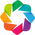

In [96]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [97]:
links=pd.DataFrame(data['links'])
links['source'] = Ex1000['대여 스테이션 정보']
links['target'] = Ex1000['반납 스테이션 정보']
links['value'] = Ex1000['대여일시']
hv.Chord(links)

:Chord   [source,target]   (value)

In [129]:
station = pd.read_csv('./data/station.csv')
data=pd.DataFrame()
nodes=pd.DataFrame()
data['nodes'] = station['번호']
data['name'] = station['명칭']


In [130]:
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
nodes.data.head()

,index,nodes
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [131]:
chord = hv.Chord((link, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)